# Chocolate Sales Data Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Chocolate_Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


## Checking Info of our Data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


### Amount Column is Showing as Object so, need to change it in Numeric value

In [35]:
df['Amount'] = df['Amount'].str.replace('[$,]', '', regex=True).astype(float)

Changing Date from object into Date

In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y') 
df['Date']

0      2022-01-04
1      2022-08-01
2      2022-07-07
3      2022-04-27
4      2022-02-24
          ...    
1089   2022-05-17
1090   2022-06-07
1091   2022-07-26
1092   2022-07-28
1093   2022-05-23
Name: Date, Length: 1094, dtype: datetime64[ns]

Extract Year and Month From Date

In [112]:
# Extract Year and Month
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month
year_month_group = df.groupby(['Year', 'Month'])
monthly_counts = year_month_group.size().reset_index(name='Count') 
monthly_sales = year_month_group["Amount"].sum().reset_index(name='sale_sum')
box_monthly =  year_month_group["Boxes Shipped"].sum().reset_index(name='box_sum')
box_monthly

,Year,Month,box_sum
0,2022,1,27535
1,2022,2,18015
2,2022,3,19561
3,2022,4,21003
4,2022,5,21856
5,2022,6,26260
6,2022,7,22876
7,2022,8,19901


# Now Describing the Data

In [41]:
df.describe()

,Date,Amount,Boxes Shipped,Year,Month
count,1094,1094.000000,1094.000000,1094.0,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989,2022.0,4.576782
min,2022-01-03 00:00:00,7.000000,1.000000,2022.0,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000,2022.0,3.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000,2022.0,5.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000,2022.0,7.000000
max,2022-08-31 00:00:00,22050.000000,709.000000,2022.0,8.000000
std,NaN,4102.442014,121.544145,0.0,2.316465


## Exploratory Data Analysis (EDA)

In [44]:
df['Product']

0           Mint Chip Choco
1             85% Dark Bars
2       Peanut Butter Cubes
3       Peanut Butter Cubes
4       Peanut Butter Cubes
               ...         
1089    Spicy Special Slims
1090             White Choc
1091    Organic Choco Syrup
1092                Eclairs
1093         70% Dark Bites
Name: Product, Length: 1094, dtype: object

## Monthly Chocolate Sales 

C:\Users\ashis\AppData\Local\Temp\ipykernel_25536\1926534783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = monthly_sales , x = "Month", y = "sale_sum", palette = c, edgecolor = "white")


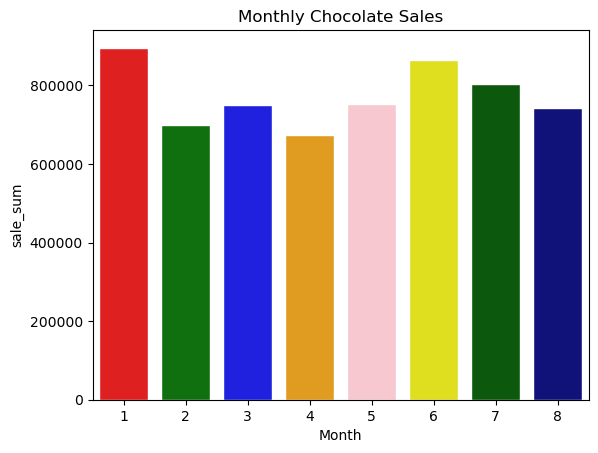

In [46]:
c = ['red','green','blue','orange','pink','yellow','darkgreen','darkblue']

sns.barplot(data = monthly_sales , x = "Month", y = "sale_sum", palette = c, edgecolor = "white")
plt.title('Monthly Chocolate Sales')
plt.show()


## Country Chocolate Sales

In [48]:
country_sales = df.groupby(['Country'])[['Amount']].sum()
country_sales

,Amount
Country,
Australia,1137367.0
Canada,962899.0
India,1045800.0
New Zealand,950418.0
UK,1051792.0
USA,1035349.0


In [50]:
country_sales = df.groupby(["Country"])["Amount"].sum().reset_index(name='sale_sum_country')
country_sales

,Country,sale_sum_country
0,Australia,1137367.0
1,Canada,962899.0
2,India,1045800.0
3,New Zealand,950418.0
4,UK,1051792.0
5,USA,1035349.0


C:\Users\ashis\AppData\Local\Temp\ipykernel_25536\154087448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x =  'Country', y = 'Amount', palette = c , edgecolor = "white")
C:\Users\ashis\AppData\Local\Temp\ipykernel_25536\154087448.py:3: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.barplot(data = df, x =  'Country', y = 'Amount', palette = c , edgecolor = "white")


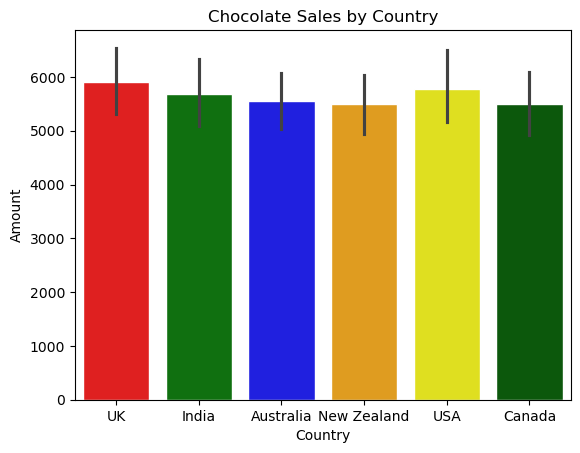

In [52]:
c = ['red','green','blue','orange','yellow','darkgreen','darkblue']

sns.barplot(data = df, x =  'Country', y = 'Amount', palette = c , edgecolor = "white")
plt.title('Chocolate Sales by Country')
plt.show()

## Total Chocolate Sales Percantage In Countries

In [54]:
sale_sum = country_sales["sale_sum_country"].sum()
country_sales['percent_sales'] = round(100 *country_sales["sale_sum_country"]/sale_sum, 1 )
country_sales

,Country,sale_sum_country,percent_sales
0,Australia,1137367.0,18.4
1,Canada,962899.0,15.6
2,India,1045800.0,16.9
3,New Zealand,950418.0,15.4
4,UK,1051792.0,17.0
5,USA,1035349.0,16.7


## Total Chocolate Sales by Products

In [56]:
df.groupby("Product")["Amount"].sum().reset_index(name="total_sales").sort_values(by="total_sales", ascending=False)

,Product,total_sales
19,Smooth Sliky Salty,349692.0
0,50% Dark Bites,341712.0
21,White Choc,329147.0
17,Peanut Butter Cubes,324842.0
10,Eclairs,312445.0
3,99% Dark & Pure,299796.0
2,85% Dark Bars,299229.0
16,Organic Choco Syrup,294700.0
20,Spicy Special Slims,293454.0
14,Mint Chip Choco,283969.0


## TOP 10 Product Sales in Country

In [58]:
df.groupby(["Product", "Country"])["Amount"].sum().reset_index(name="total_sales").sort_values(by="total_sales", ascending=False).head(10)

,Product,Country,total_sales
0,50% Dark Bites,Australia,89222.0
87,Mint Chip Choco,New Zealand,86709.0
113,Raspberry Choco,USA,83524.0
106,Peanut Butter Cubes,UK,79695.0
22,99% Dark & Pure,UK,79100.0
62,Eclairs,India,79009.0
104,Peanut Butter Cubes,India,76909.0
116,Smooth Sliky Salty,India,76041.0
118,Smooth Sliky Salty,UK,75628.0
122,Spicy Special Slims,India,75495.0


In [60]:
df.groupby(["Country"])["Boxes Shipped"].sum().reset_index(name= "total_boxes").sort_values(by= "total_boxes", ascending= False)

,Country,total_boxes
0,Australia,32647
1,Canada,31221
4,UK,30265
2,India,29470
5,USA,26824
3,New Zealand,26580


##  Most Popular Products In India

In [62]:
comparison_india_price = df[df['Country'] == "India"].groupby("Product")["Amount"].sum().reset_index(name="Total Sale")
comparison_india_boxes = df[df['Country'] == "India"].groupby("Product")["Boxes Shipped"].sum().reset_index(name="Total Boxes")

comparison_india = comparison_india_price.merge(comparison_india_boxes, on="Product")
comparison_india

,Product,Total Sale,Total Boxes
0,50% Dark Bites,64547.0,1237
1,70% Dark Bites,34713.0,1511
2,85% Dark Bars,56630.0,1584
3,99% Dark & Pure,41923.0,1455
4,After Nines,58758.0,1874
5,Almond Choco,50820.0,1296
6,Baker's Choco Chips,27510.0,1265
7,Caramel Stuffed Bars,35427.0,1635
8,Choco Coated Almonds,27958.0,1328
9,Drinking Coco,45892.0,1101


## Most Fav Products For Each Country

In [98]:
def most_fav_product(df):
    mostfav = (df.groupby(['Country', 'Product']).agg(total_sales = ("Amount", "sum"), total_boxes = ("Boxes Shipped", "sum")).reset_index())
    mostfav = mostfav.sort_values(by = ["Country", "total_sales"], ascending = [True, False])
    mostfav = mostfav.groupby("Country").head(1)
    return mostfav
Mostfav_df = most_fav_product(df)
Mostfav_df

,Country,Product,total_sales,total_boxes
0,Australia,50% Dark Bites,89222.0,3182
41,Canada,Smooth Sliky Salty,68257.0,2271
54,India,Eclairs,79009.0,1985
80,New Zealand,Mint Chip Choco,86709.0,2537
105,UK,Peanut Butter Cubes,79695.0,1265
128,USA,Raspberry Choco,83524.0,1497


## Least Fav product for Each Country

In [107]:
def least_fav_product(df):
    leastfav = (df.groupby(['Country', 'Product']).agg(total_sales = ("Amount", "sum"), total_boxes = ("Boxes Shipped", "sum")).reset_index())
    leastfav = leastfav.sort_values(by = ["Country", "total_sales"], ascending = [True, False])
    leastfav = leastfav.groupby("Country").tail(1)
    return leastfav
Leastfav_df = least_fav_product(df)
Leastfav_df

,Country,Product,total_sales,total_boxes
4,Australia,After Nines,27769.0,912
40,Canada,Raspberry Choco,12873.0,971
55,India,Fruit & Nut Bars,18368.0,953
74,New Zealand,Choco Coated Almonds,20888.0,455
89,UK,70% Dark Bites,20713.0,1259
111,USA,70% Dark Bites,20580.0,631


## Most Fav Products in Different Months

In [130]:
monthly_fav_product = df.groupby(["Year", "Month", "Product"])["Amount"].sum().reset_index(name = "Monthly Total")
top_products  =  monthly_fav_product.loc[monthly_fav_product.groupby(['Year', 'Month'])['Monthly Total'].idxmax()]
top_products

,Year,Month,Product,Monthly Total
3,2022,1,99% Dark & Pure,71883.0
39,2022,2,Peanut Butter Cubes,64533.0
63,2022,3,Smooth Sliky Salty,73969.0
84,2022,4,Raspberry Choco,63406.0
107,2022,5,Smooth Sliky Salty,71939.0
121,2022,6,Fruit & Nut Bars,87682.0
148,2022,7,Organic Choco Syrup,94241.0
156,2022,8,85% Dark Bars,97209.0


## Sales Person Performance

In [135]:
sales_performance = df.groupby(['Sales Person'])['Amount'].sum().reset_index(name = "sales_sum").sort_values(by  = "sales_sum", ascending = False)
sales_performance


,Sales Person,sales_sum
5,Ches Bonnell,320901.0
20,Oby Sorrel,316645.0
17,Madelene Upcott,316099.0
3,Brien Boise,312816.0
16,Kelci Walkden,311710.0
23,Van Tuxwell,303149.0
7,Dennison Crosswaite,291669.0
2,Beverie Moffet,278922.0
14,Kaine Padly,266490.0
19,Marney O'Breen,259742.0


## Best Sales Person for Every Month

In [142]:
monthly_sales_person = df.groupby(['Month', 'Year', "Sales Person"])["Amount"].sum().reset_index(name = "Monthly_sales")
top_sales_person = monthly_sales_person.loc[monthly_sales_person.groupby(['Month','Year'])['Monthly_sales'].idxmax()]
top_sales_person

,Month,Year,Sales Person,Monthly_sales
14,1,2022,Kaine Padly,66192.0
27,2,2022,Beverie Moffet,65135.0
65,3,2022,Kelci Walkden,68159.0
79,4,2022,Ches Bonnell,53753.0
102,5,2022,Brien Boise,75390.0
147,6,2022,Van Tuxwell,81326.0
169,7,2022,Oby Sorrel,54600.0
184,8,2022,Gunar Cockshoot,69251.0


C:\Users\ashis\AppData\Local\Temp\ipykernel_25536\2193996986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sales_person, x='X_Label', y='Monthly_sales', palette="Greens_r")


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Kaine Padly - in 1'),
  Text(1, 0, 'Beverie Moffet - in 2'),
  Text(2, 0, 'Kelci Walkden - in 3'),
  Text(3, 0, 'Ches Bonnell - in 4'),
  Text(4, 0, 'Brien Boise - in 5'),
  Text(5, 0, 'Van Tuxwell - in 6'),
  Text(6, 0, 'Oby Sorrel - in 7'),
  Text(7, 0, 'Gunar Cockshoot - in 8')])

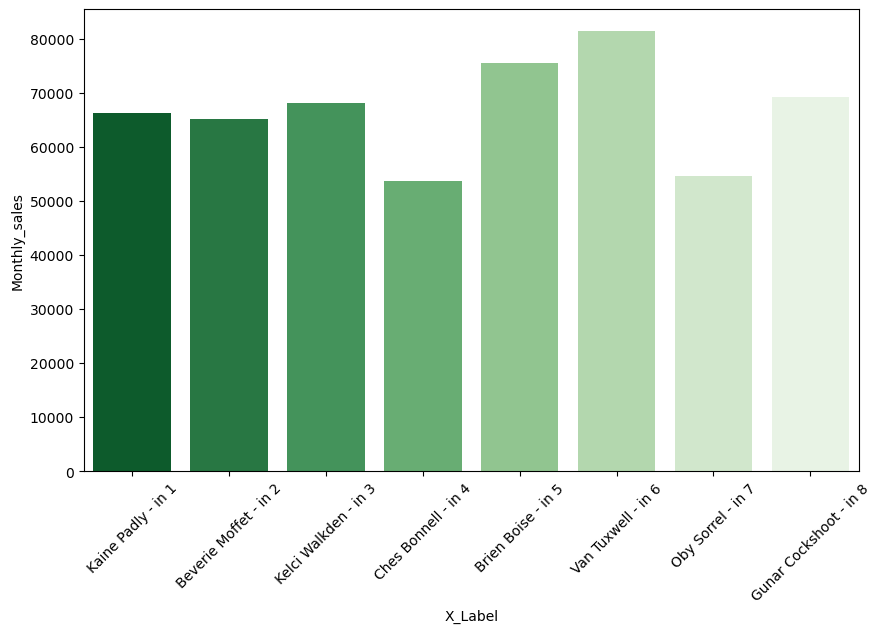

In [150]:
top_sales_person['X_Label'] = top_sales_person['Sales Person'] + ' - in ' + top_sales_person['Month'].astype(str)
plt.figure(figsize=(10, 6)) 
sns.barplot(data=top_sales_person, x='X_Label', y='Monthly_sales', palette="Greens_r") 
plt.xticks(rotation=45) 